# Uczenie Maszynowe - ćwiczenia 6

Klasyfikacja - ćwiczenia dotyczące klasyfikacji wraz z wprowadzeniem teoretycznym do tematu klasyfikacji.

# Klasyfikacja

## Problem klasyfikacji - na przykładzie regresji logistycznej


### Funkcja decyzyjna w regresji logistycznej

Regresja logistyczna to algorytm klasyfikacyjny stosowany do zadań binarnej klasyfikacji. Funkcja decyzyjna jest określona jako:

$$
P(y=1 | x) = \sigma(w^T x + b)
$$

gdzie:
- $ \sigma(z) = \frac{1}{1 + e^{-z}} $ – funkcja sigmoid (przekształca wyniki w zakres $ (0, 1) $),
- $ w $ – wektor wag,
- $ x $ – wektor cech,
- $ b $ – bias (przesunięcie).

Funkcja sigmoid zwraca prawdopodobieństwo przynależności próbki do klasy $ y=1 $.

#### 1. Importowanie bibliotek

Najpierw musimy zaimportować niezbędne biblioteki, które pozwolą nam przeprowadzić analizę danych, stworzyć model i ocenić jego wyniki. W tym przypadku będziemy korzystać z takich bibliotek jak numpy, pandas, sklearn oraz matplotlib.


In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


#### 2. Problem klasyfikacyjny

Za pomocą funkcji load_iris załadujemy wbudowany zbiór danych Iris, który zawiera pomiary czterech cech dla trzech gatunków kwiatów Iris. Dane te zostały już przygotowane i nie wymagają dodatkowego czyszczenia.

In [6]:
data = load_iris()
X = data.data  # cechy (długość i szerokość działki oraz płatka)
y = data.target  # etykiety (gatunki kwiatu)
pd.DataFrame(X,columns=data.feature_names)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [14]:
print(pd.DataFrame(y).head())
print(data.target_names)

   0
0  0
1  0
2  0
3  0
4  0
['setosa' 'versicolor' 'virginica']


X to macierz cech, która zawiera cztery zmienne: długość działki, szerokość działki, długość płatka, szerokość płatka.

y to wektor etykiet, który zawiera numer klasy, czyli gatunek kwiatu (0: Setosa, 1: Versicolor, 2: Virginica).

#### Wstępny preprocessing danych

Ten etap jest bardzo zbliżony do procesu wstępnego przetwarzania danych w regresji. Możemy wstępnie przeanalizować dane, przeszukać je pod kątem brakujących wartości i tym podobne.

Zaczynamy od rozbicia danych na zbiory uczące i testowe.


In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [20]:
import seaborn as sns

In [37]:
df_data = pd.concat([pd.DataFrame(X_train,columns=data.feature_names),pd.DataFrame(y_train)],axis=1)
df_data

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),0
0,5.5,2.4,3.7,1.0,1
1,6.3,2.8,5.1,1.5,2
2,6.4,3.1,5.5,1.8,2
3,6.6,3.0,4.4,1.4,1
4,7.2,3.6,6.1,2.5,2
...,...,...,...,...,...
100,6.1,2.8,4.0,1.3,1
101,4.9,2.5,4.5,1.7,2
102,5.8,4.0,1.2,0.2,0
103,5.8,2.6,4.0,1.2,1


<Axes: >

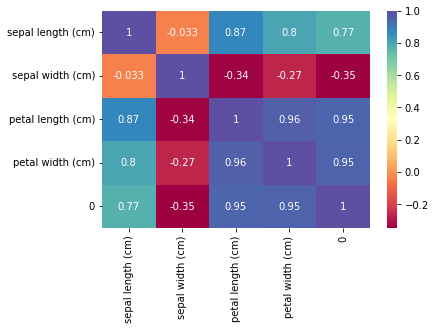

In [39]:
sns.heatmap(df_data.corr(),annot=True,cmap='Spectral')

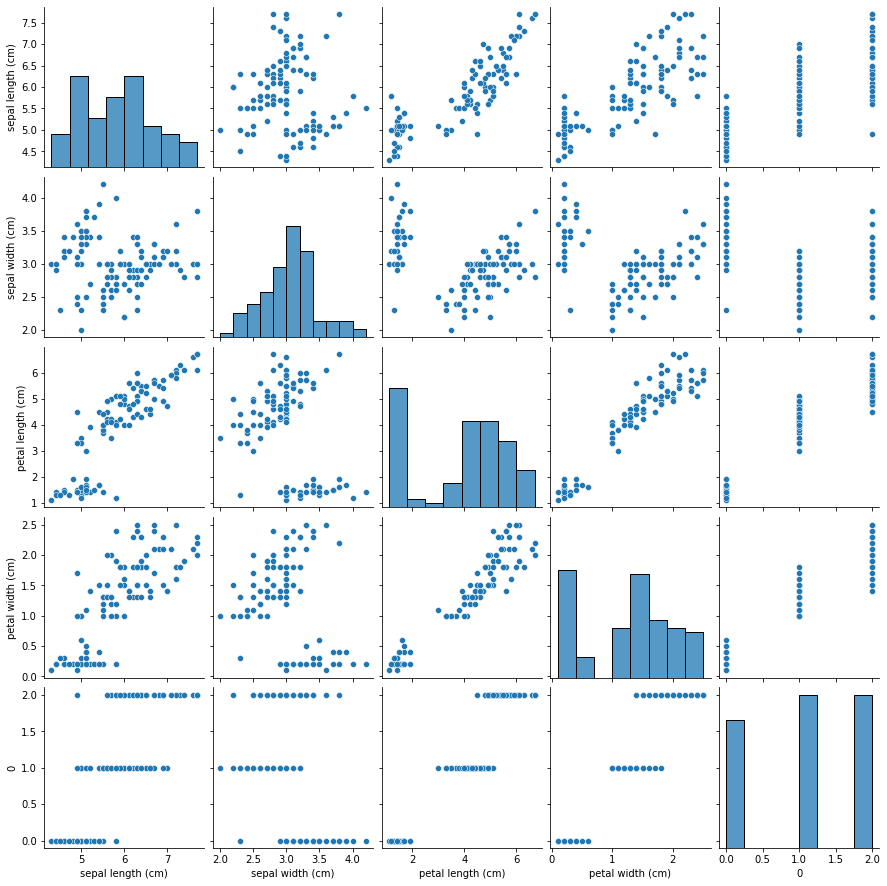

In [40]:
sns.pairplot(df_data)

#### Trenowanie modelu

Proces trenowania przebiega zgodnie z ideą implementacji modeli w scikit-learn. Korzystamy z metod fit(), fit_predict() i predict() do treningu i ewaluacji.

In [41]:
model = LogisticRegression()
model.fit(X_train_scaled, y_train)

LogisticRegression()

#### Proces predykcji

Predykcją modelu jest oczekiwana klasa obiektu. W tym przypadku mamy do czynienia z predykcją wieloklasową. Zatem oczekiwanym wynikiem jest jedna z klas.

Metoda predict() zwraca przeiwidywane klasy

In [48]:
y_train_pred = model.predict(X_train)
y_train_pred

array([2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 2,
       2, 1, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2, 1, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 2, 2, 1, 2, 2,
       2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 1,
       2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2])

Które możemy zestawić z oczekiwaną klasą w celu oceny naszego modelu:

In [57]:
compare = pd.DataFrame(np.stack((y_train,y_train_pred))).T
compare.columns = ['True','Predicted']
compare

,True,Predicted
0,1,2
1,2,2
2,2,2
3,1,2
4,2,2
...,...,...
100,1,2
101,2,2
102,0,1
103,1,2


#### Wizualizacja modelu

Możemy wybrać tylko dwie cechy (np. długość działki i długość płatka), aby móc zobaczyć granice klas.

C:\Users\kamil\AppData\Local\Temp\ipykernel_19124\2104552861.py:16: UserWarning: You passed a edgecolor/edgecolors ('k') for an unfilled marker ('x').  Matplotlib is ignoring the edgecolor in favor of the facecolor.  This behavior may change in the future.
  plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.Spectral, edgecolors='k', marker='x')


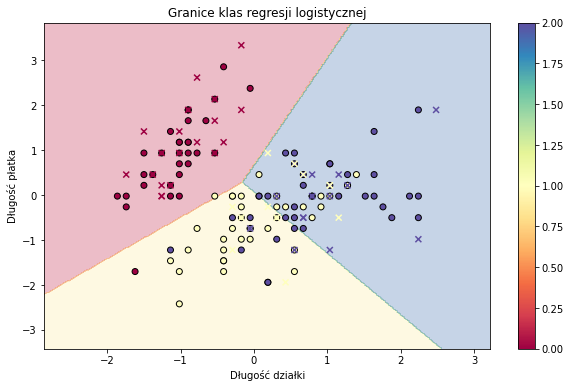

In [69]:
import matplotlib.pyplot as plt

# Siatka punktów do wyrysowania tła
x_min, x_max = X_train_scaled[:, 0].min() - 1, X_train_scaled[:, 0].max() + 1
y_min, y_max = X_train_scaled[:, 1].min() - 1, X_train_scaled[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                     np.arange(y_min, y_max, 0.02))

# Predykcja dla siatki punktów
Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.3,cmap='Spectral')
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train, cmap=plt.cm.Spectral, edgecolors='k', marker='o')
plt.scatter(X_test_scaled[:, 0], X_test_scaled[:, 1], c=y_test, cmap=plt.cm.Spectral, edgecolors='k', marker='x')
plt.title("Granice klas regresji logistycznej")
plt.xlabel('Długość działki')
plt.ylabel('Długość płatka')
plt.colorbar()
plt.show()


#### Zdolność do radzenia sobie modelów z niepewnością

W regresji logistycznej wynik modelu to nie jedynie przypisana etykieta (np. 0 lub 1 w klasyfikacji binarnej), ale także wartość prawdopodobieństwa, która wskazuje, jak pewny jest model co do swojej prognozy. Prawdopodobieństwo to jest obliczane na podstawie funkcji logistycznej, która mapuje liniową kombinację cech wejściowych na zakres od 0 do 1. Daje to wgląd w stopień pewności, z jakim model przypisuje próbkę do konkretnej klasy.

Scikit-learn dostarcza metodę 'predict_proba()', która dostarcza miary pewności predykcji:

In [80]:
# Predykcja prawdopodobieństw
y_train_prob = model.predict_proba(X_train)

In [81]:
pd.concat([pd.DataFrame(y_train_prob),compare],axis=1)

,0,1,2,True,Predicted
0,8.686659e-07,0.021324,0.978675,1,2
1,1.757011e-07,0.013138,0.986862,2,2
2,2.298487e-07,0.008803,0.991197,2,2
3,1.058837e-07,0.010218,0.989782,1,2
4,5.576740e-08,0.004681,0.995319,2,2
...,...,...,...,...,...
100,3.162684e-07,0.012968,0.987032,1,2
101,6.121652e-06,0.017965,0.982029,2,2
102,7.193460e-06,0.002460,0.997533,0,1
103,5.244122e-07,0.016647,0.983353,1,2


Oczywiście ich suma wynosi 1.

In [82]:
y_train_prob.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1.])

### Funkcja decyzyjna algorytmu klasyfikacyjnego

Funkcja sigmoidalna, często używana w regresji logistycznej, jest funkcją matematyczną, która przekształca dowolną wartość na zakres od 0 do 1. Jest to funkcja o kształcie litery "S" i jest wykorzystywana do modelowania prawdopodobieństw w problemach klasyfikacyjnych. 

Funkcja sigmoidalna mapuje każdą wartość xx na wynik między 0 a 1:

    Jeśli x jest bardzo duże (np. x→+∞), σ(x)→1,
    Jeśli x jest bardzo małe (np. x→−∞), σ(x)→0,
    Gdy x=0, σ(x)=0.5σ.
    
Funkcja sigmoidalna jest często używana w regresji logistycznej, gdzie x jest kombinacją liniową cech wejściowych, a wynik funkcji σ(x) to prawdopodobieństwo przynależności do jednej z klas.

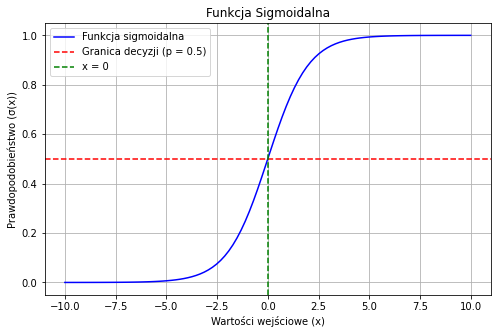

In [94]:
import numpy as np
import matplotlib.pyplot as plt

# Definicja funkcji sigmoidalnej
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

# Przykładowe dane wejściowe (można to traktować jako wynik funkcji decyzyjnej)
x_values = np.linspace(-10, 10, 100)  # Zakres od -10 do 10

# Zastosowanie funkcji sigmoidalnej na przykładzie
y_values = sigmoid(x_values)

# Rysowanie wykresu funkcji sigmoidalnej
plt.figure(figsize=(8, 5))
plt.plot(x_values, y_values, label="Funkcja sigmoidalna", color="b")
plt.axhline(0.5, color="r", linestyle="--", label="Granica decyzji (p = 0.5)")
plt.axvline(0, color="g", linestyle="--", label="x = 0")
plt.title("Funkcja Sigmoidalna")
plt.xlabel("Wartości wejściowe (x)")
plt.ylabel("Prawdopodobieństwo (σ(x))")
plt.legend()
plt.grid(True)
plt.show()

### Ewaluacja modelu

Jak zapewne sie domyślacie - metody oceny modelu stosowane w regresji, w klasyfikacji nie mają zastosowania. Podobnie jednak, metod jest kilka. Spójrzmy na najprostsze z nich:

In [96]:
accuracy_score(y_train,y_train_pred)

0.3523809523809524

In [97]:
confusion_matrix(y_train, y_train_pred)

array([[ 0, 22,  9],
       [ 0,  0, 37],
       [ 0,  0, 37]], dtype=int64)

In [99]:
y_test_pred = model.predict(X_test)

In [100]:
accuracy_score(y_test,y_test_pred)

0.28888888888888886

In [101]:
confusion_matrix(y_test,y_test_pred)

array([[ 0,  0, 19],
       [ 0,  0, 13],
       [ 0,  0, 13]], dtype=int64)

<Axes: >

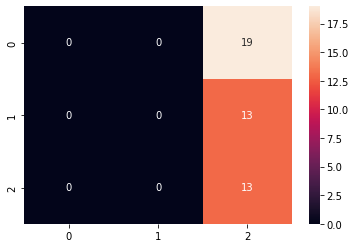

In [103]:
sns.heatmap(confusion_matrix(y_test,y_test_pred),annot=True)


## **1. Macierz pomyłek (Confusion Matrix)**

Macierz pomyłek to tablica, która pokazuje liczbę poprawnych i błędnych klasyfikacji dla każdej klasy. Składa się z czterech kluczowych wartości (dla klasyfikacji binarnej):

- **True Positive (TP)**: Próbki poprawnie zaklasyfikowane jako pozytywne.
- **True Negative (TN)**: Próbki poprawnie zaklasyfikowane jako negatywne.
- **False Positive (FP)**: Próbki błędnie zaklasyfikowane jako pozytywne (tzw. fałszywe alarmy).
- **False Negative (FN)**: Próbki błędnie zaklasyfikowane jako negatywne.

|                 | Predykcja pozytywna | Predykcja negatywna |
|-----------------|---------------------|---------------------|
| **Prawdziwie pozytywne (TP)** | Liczba próbek     | -                   |
| **Fałszywie pozytywne (FP)** | Liczba próbek     | -                   |
| **Fałszywie negatywne (FN)** | -                 | Liczba próbek       |
| **Prawdziwie negatywne (TN)** | -                 | Liczba próbek       |

---

## **2. Accuracy (dokładność)**

Accuracy mierzy odsetek poprawnie zaklasyfikowanych próbek w całym zbiorze danych:

$$
\text{Accuracy} = \frac{TP + TN}{TP + TN + FP + FN}
$$

- **Zaleta**: Proste do zrozumienia i obliczenia.
- **Wada**: Niewystarczające w przypadku danych niezbalansowanych (np. 95% próbek w jednej klasie).

---

## Zadania

### Metody preprocessingu w klasyfikacji ML

Preprocessing danych jest kluczowym krokiem w procesie budowy modeli. Pomaga poprawić jakość danych oraz dostosować je do wymagań algorytmów klasyfikacji. Szczegółowy opis na wykładzie. Tymczasem jednak zadanie polegać będzie na zastosowaniu jednej z technik do naszego problemu klasyfikacyjnego.

### Zadanie 1. Przeprowadź całkowity proces uczenia do problemu klasyfikacji z wykorzystaniem podanego kodu. Rozwiń go o element skalowania danych. Wykorzystaj podane metody. Określ jak wpłynęły one na dokładność modelu.

    StandardScaler: Normalizacja cech do średniej 0 i odchylenia standardowego 1.
    MinMaxScaler: Skalowanie cech do zakresu [0, 1].
    
Zbiór danych to odręczne pismo cyfr od 0 do 9.



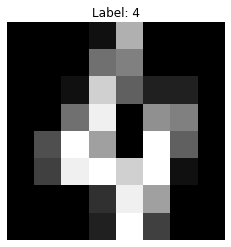

In [174]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

# Load the Digits dataset
digits = load_digits()

# Get the first image and its label
image = digits.images[4]
label = digits.target[4]

# Plot the first image
plt.imshow(image, cmap='gray')
plt.title(f"Label: {label}")
plt.axis('off')  # Hide axis
plt.show()


In [171]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_digits
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

data = load_digits()
X = data.data
y = data.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

model = LogisticRegression(max_iter=600)
model.fit(X_train, y_train)


# Przeprowadzenie cross-validation (CV) z 10-folds
cv_scores = cross_val_score(model, X_train, y_train, cv=3, scoring='accuracy',
                           verbose=0)

y_test_pred = model.predict(X_test)

accuracy_score(y_test,y_test_pred)

0.9722222222222222

### Zadanie 2. Porównanie algorytmów klasyfikacyjnych

Użyj zbioru danych digits z biblioteki sklearn, który zawiera dane o chemicznym składzie winogron różnych klas win. Przeprowadź klasyfikację, porównując różne algorytmy: regresję logistyczną, drzewa decyzyjne, maszyny wektorów nośnych (SVM) i k-najbliższych sąsiadów (KNN).

Podziel dane na zbiory, wykorzystaj CV oraz standaryzacje. Porównaj modele pod kątem dokładności (Accuracy) oraz macierzy pomyłek.

Spróbuj dobrać hiperparametry dla każdej z metod w sposób optymalny.